# Form Recognition in Spark-OCR fine-tuning

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-ocr-workshop/blob/master/jupyter/FormRecognition/SparkOcrFormRecognitionFineTuning.ipynb)

Set license and AWS keys

In [ ]:
## Install spark-ocr python packge
Need to specify:
- secret
- license
- aws credentials

Option #1 - define in this cell

In [ ]:
secret = ""
license = ""
version = secret.split("-")[0]

import os
if license:
    os.environ['JSL_OCR_LICENSE'] = license

Option #2 - provide spark_ocr.json file

In [ ]:
import json, os
import sys

if 'google.colab' in sys.modules:
    from google.colab import files

    if 'spark_ocr.json' not in os.listdir():
      license_keys = files.upload()
      os.rename(list(license_keys.keys())[0], 'spark_ocr.json')

with open('spark_ocr.json') as f:
    license_keys = json.load(f)

# Defining license key-value pairs as local variables
locals().update(license_keys)

## Install deps 

In [ ]:
!pip install -U --no-cache-dir gdown --pre

In [4]:
# downloading and unzipping the dataset
!rm -r ./llmv2_Alab_data
!wget https://s3.amazonaws.com/dev.johnsnowlabs.com/public/datasets/2022-06-15-03-49-02_10KForms.zip
!unzip "2022-06-15-03-49-02_10KForms.zip" -d ./llmv2_Alab_data

# Separating the inference image
!mkdir test
!mv ./llmv2_Alab_data/images/8670_10K_2021_0000008670-21-000027-1654750365.htm-1654750365.pdf-1654750365_0.png ./test/8670_10K_2021_0000008670-21-000027-1654750365.htm-1654750365.pdf-1654750365_0.png

rm: cannot remove './llmv2_Alab_data': No such file or directory
--2023-04-01 21:10:52--  https://s3.amazonaws.com/dev.johnsnowlabs.com/public/datasets/2022-06-15-03-49-02_10KForms.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.118.224, 52.216.53.96, 52.217.166.136, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.118.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54063914 (52M) [application/zip]
Saving to: ‘2022-06-15-03-49-02_10KForms.zip’

2022-06-15-03-49-02 100%[===================>]  51,56M  4,57MB/s    in 11s     

2023-04-01 21:11:04 (4,50 MB/s) - ‘2022-06-15-03-49-02_10KForms.zip’ saved [54063914/54063914]

Archive:  2022-06-15-03-49-02_10KForms.zip
   creating: ./llmv2_Alab_data/images/
  inflating: ./llmv2_Alab_data/result.json  
  inflating: ./llmv2_Alab_data/images/1794515_10K_2020_0001794515-21-000061-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1585521_10K_2021_0001585521-21

  inflating: ./llmv2_Alab_data/images/1366561_10K_2021_0001366561-21-000036-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1477720_10K_2021_0001477720-21-000007-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1615165_10K_2020_0001564590-21-011303-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1721947_10K_2020_0001558370-21-002391-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1535379_10K_2021_0001628280-21-005632-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1433195_10K_2020_0001433195-21-000024-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/922521_10K_2020_0001628280-21-004460-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1627857_10K_2020_0001628280-21-003310-1654750365.htm-1654750365.pdf-1654750365_0.png  
 

  inflating: ./llmv2_Alab_data/images/727634_10K_2020_0001213900-21-020616-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1535527_10K_2021_0001535527-21-000007-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1052054_10K_2020_0001562762-21-000123-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1301991_10K_2021_0001829126-21-011870-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1288847_10K_2020_0001288847-21-000029-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1327567_10K_2021_0001327567-21-000029-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/896878_10K_2021_0000896878-21-000233-1654750365.htm-1654750365.pdf-1654750365_0.png  
  inflating: ./llmv2_Alab_data/images/1050446_10K_2020_0001564590-21-005783-1654750365.htm-1654750365.pdf-1654750365_0.png  
  

In [ ]:
# Installing Dependencies
%pip install --upgrade git+https://github.com/JohnSnowLabs/detectron2.git@frozen_sparkocr
%pip install --upgrade git+https://github.com/JohnSnowLabs/transformers.git@layoutlmv2_onnx

%pip install pyyaml
%pip install datasets==1.18.2


# Installing pyspark and spark-nlp
%pip install --upgrade -q pyspark==3.2.1 spark-nlp==$PUBLIC_VERSION

# Installing Spark OCR
%pip install spark-ocr==$OCR_VERSION\+spark32 --extra-index-url=https://pypi.johnsnowlabs.com/$SPARK_OCR_SECRET --upgrade

## Note: 
you should restart the runtime at this point and continue below

## Start Spark session with Spark OCR

In [ ]:
import json, os

with open("spark_ocr.json", 'r') as f:
  license_keys = json.load(f)

# Adding license key-value pairs to environment variables
os.environ.update(license_keys)

# Defining license key-value pairs as local variables
locals().update(license_keys)

In [ ]:
from sparkocr import start
from pyspark import SparkConf

secret = license_keys["SPARK_OCR_SECRET"] if "SPARK_OCR_SECRET" in license_keys else secret
spark_ocr_jar_path = "../../../target/scala-2.12/"
spark = start(secret, jar_path = spark_ocr_jar_path)

Spark version: 3.0.2
Spark NLP version: 3.4.4
Spark OCR version: 3.12.1rc3



## Read image with form

In [3]:
%%time
from sparkocr.transformers.readers.alab_readers import AlabReaders

pyspark_dataframe = AlabReaders().dataLabeler(spark,
                                              "./llmv2_Alab_data/result.json",
                                              "./llmv2_Alab_data/images"
                                              ).cache()


12:06:45, INFO NumExpr defaulting to 4 threads.


CPU times: user 1.52 s, sys: 214 ms, total: 1.73 s
Wall time: 5.23 s


## Define pipeline for predict

In [4]:
from pyspark.ml import PipelineModel
from sparkocr.enums import *
from sparkocr.transformers import *
from sparkocr.transformers.ner import *
from sparkocr.transformers.tokenizer.hocr_tokenizer import HocrTokenizer
from sparkocr.utils import display_images_horizontal


binary_to_image = BinaryToImage() \
    .setOutputCol("image") \
    .setImageType(ImageType.TYPE_3BYTE_BGR)

img_to_hocr = ImageToHocr() \
    .setInputCol("image") \
    .setOutputCol("hocr") \
    .setIgnoreResolution(False) \
    .setOcrParams(["preserve_interword_spaces=0"])

tokenizer = HocrTokenizer() \
    .setInputCol("hocr") \
    .setOutputCol("token")


## Prepare train dataset (using predict results as training data)

In [5]:
import gc
gc.collect()

224

## Define VisualDocumentNerV21 for finetuning

* load model
* difine params of training

In [6]:
doc_ner_fine_tuned = VisualDocumentNerV21()\
            .loadHuggingFaceModel("nielsr/layoutlmv2-finetuned-funsd", spark) \
            .setInputCols(["token", "image"]) \
            .setOutputCol("entities") \
            .setWhiteList( ['Diagnosis-B',
                            'Diagnosis-I',
                            'Drug-B',
                            'Drug-I',
                            'Symptom-B',
                            'Symptom-I',
                            'others'])\
            .setLabels(['Diagnosis-B',
                            'Diagnosis-I',
                            'Drug-B',
                            'Drug-I',
                            'Symptom-B',
                            'Symptom-I',
                            'others'])\
            .setbatchSize(4) \
            .setShuffleBatchTraining(True) \
            .setnumTrainEpochs(15)\
            .setImageSize(224)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/765M [00:00<?, ?B/s]

### Pre-Training Inference

In [7]:
draw_annotations = ImageDrawAnnotations() \
            .setInputCol("image") \
            .setInputChunksCol("entities") \
            .setOutputCol("image_with_annotations") \
            .setFilledRect(False) \
            .setFontSize(14) \
            .setRectColor(Color.red) #\
            # .setColorMap(
            # {"other": Color.pink, "b-header": Color.yellow, "i-header": Color.yellow, "b-question": Color.blue,
            #  "i-question": Color.blue, "b-answer": Color.green, "i-answer": Color.green})

pipeline_predict = PipelineModel(stages=[
    binary_to_image,
    img_to_hocr,
    tokenizer,
    doc_ner_fine_tuned,
    draw_annotations
])


    Image #0:
    Origin: file:/content/test/63-1651494444_0.png
    Resolution: 0 dpi
    Width: 2550 px
    Height: 3299 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


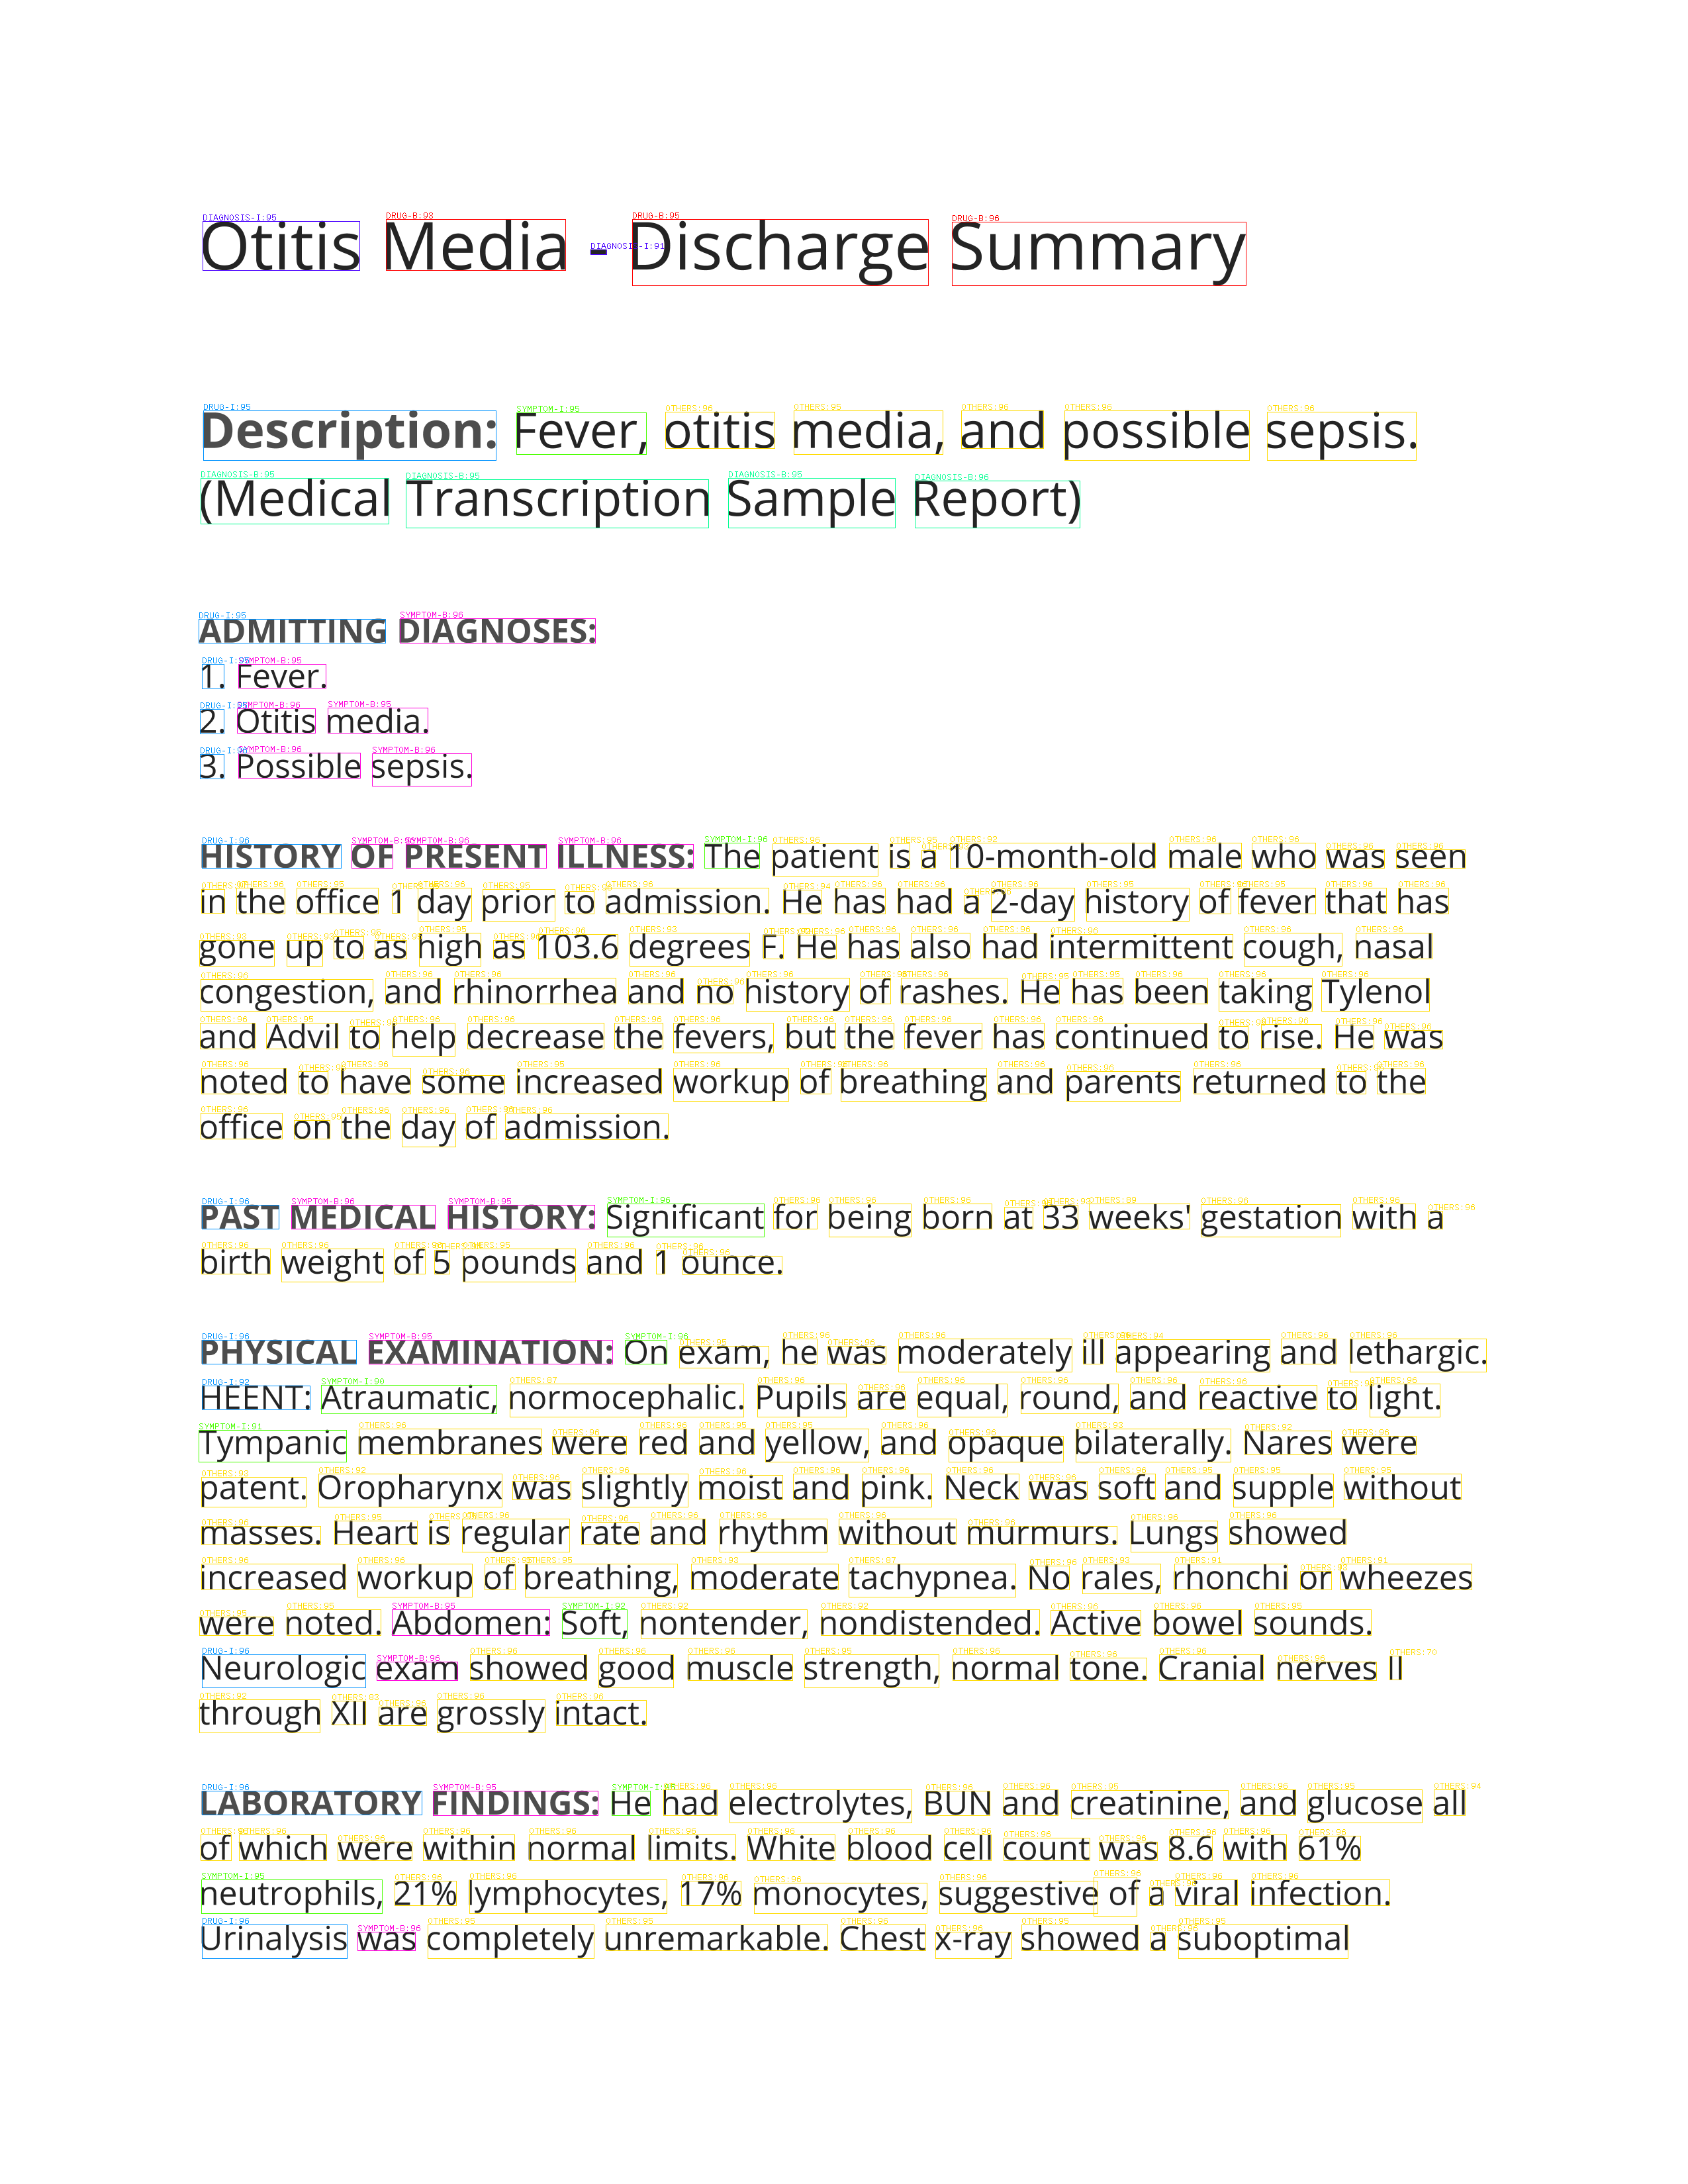

In [8]:
from sparkocr.utils import display_images_horizontal

from sparkocr.utils import display_images

  
bin_df = spark.read.format("binaryFile").load("./test")
results = pipeline_predict.transform(bin_df)

display_images(results, "image_with_annotations")


## Fit the model

In [9]:
%%time
ner_fit_model = doc_ner_fine_tuned.fit(pyspark_dataframe)


12:08:52, INFO Preparing Training Data.


  0%|          | 0/1 [00:00<?, ?ba/s]

12:18:43, INFO Pytorch model Training.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
12:18:43, INFO Training Started.
  0%|          | 0/41 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/models/layoutlmv2/modeling_layoutlmv2.py:779: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  // self.config.image_feature_pool_shape[1]
/usr/local/lib/python3.7/dist-packages/transformers/models/layou

CPU times: user 7min 20s, sys: 2min 19s, total: 9min 40s
Wall time: 19min 8s


## Call finetuned model for predict

In [10]:
pipeline_predict = PipelineModel(stages=[
    binary_to_image,
    img_to_hocr,
    tokenizer,
    ner_fit_model,
    draw_annotations
])

### Post Training Inference


    Image #0:
    Origin: file:/content/test/63-1651494444_0.png
    Resolution: 0 dpi
    Width: 2550 px
    Height: 3299 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


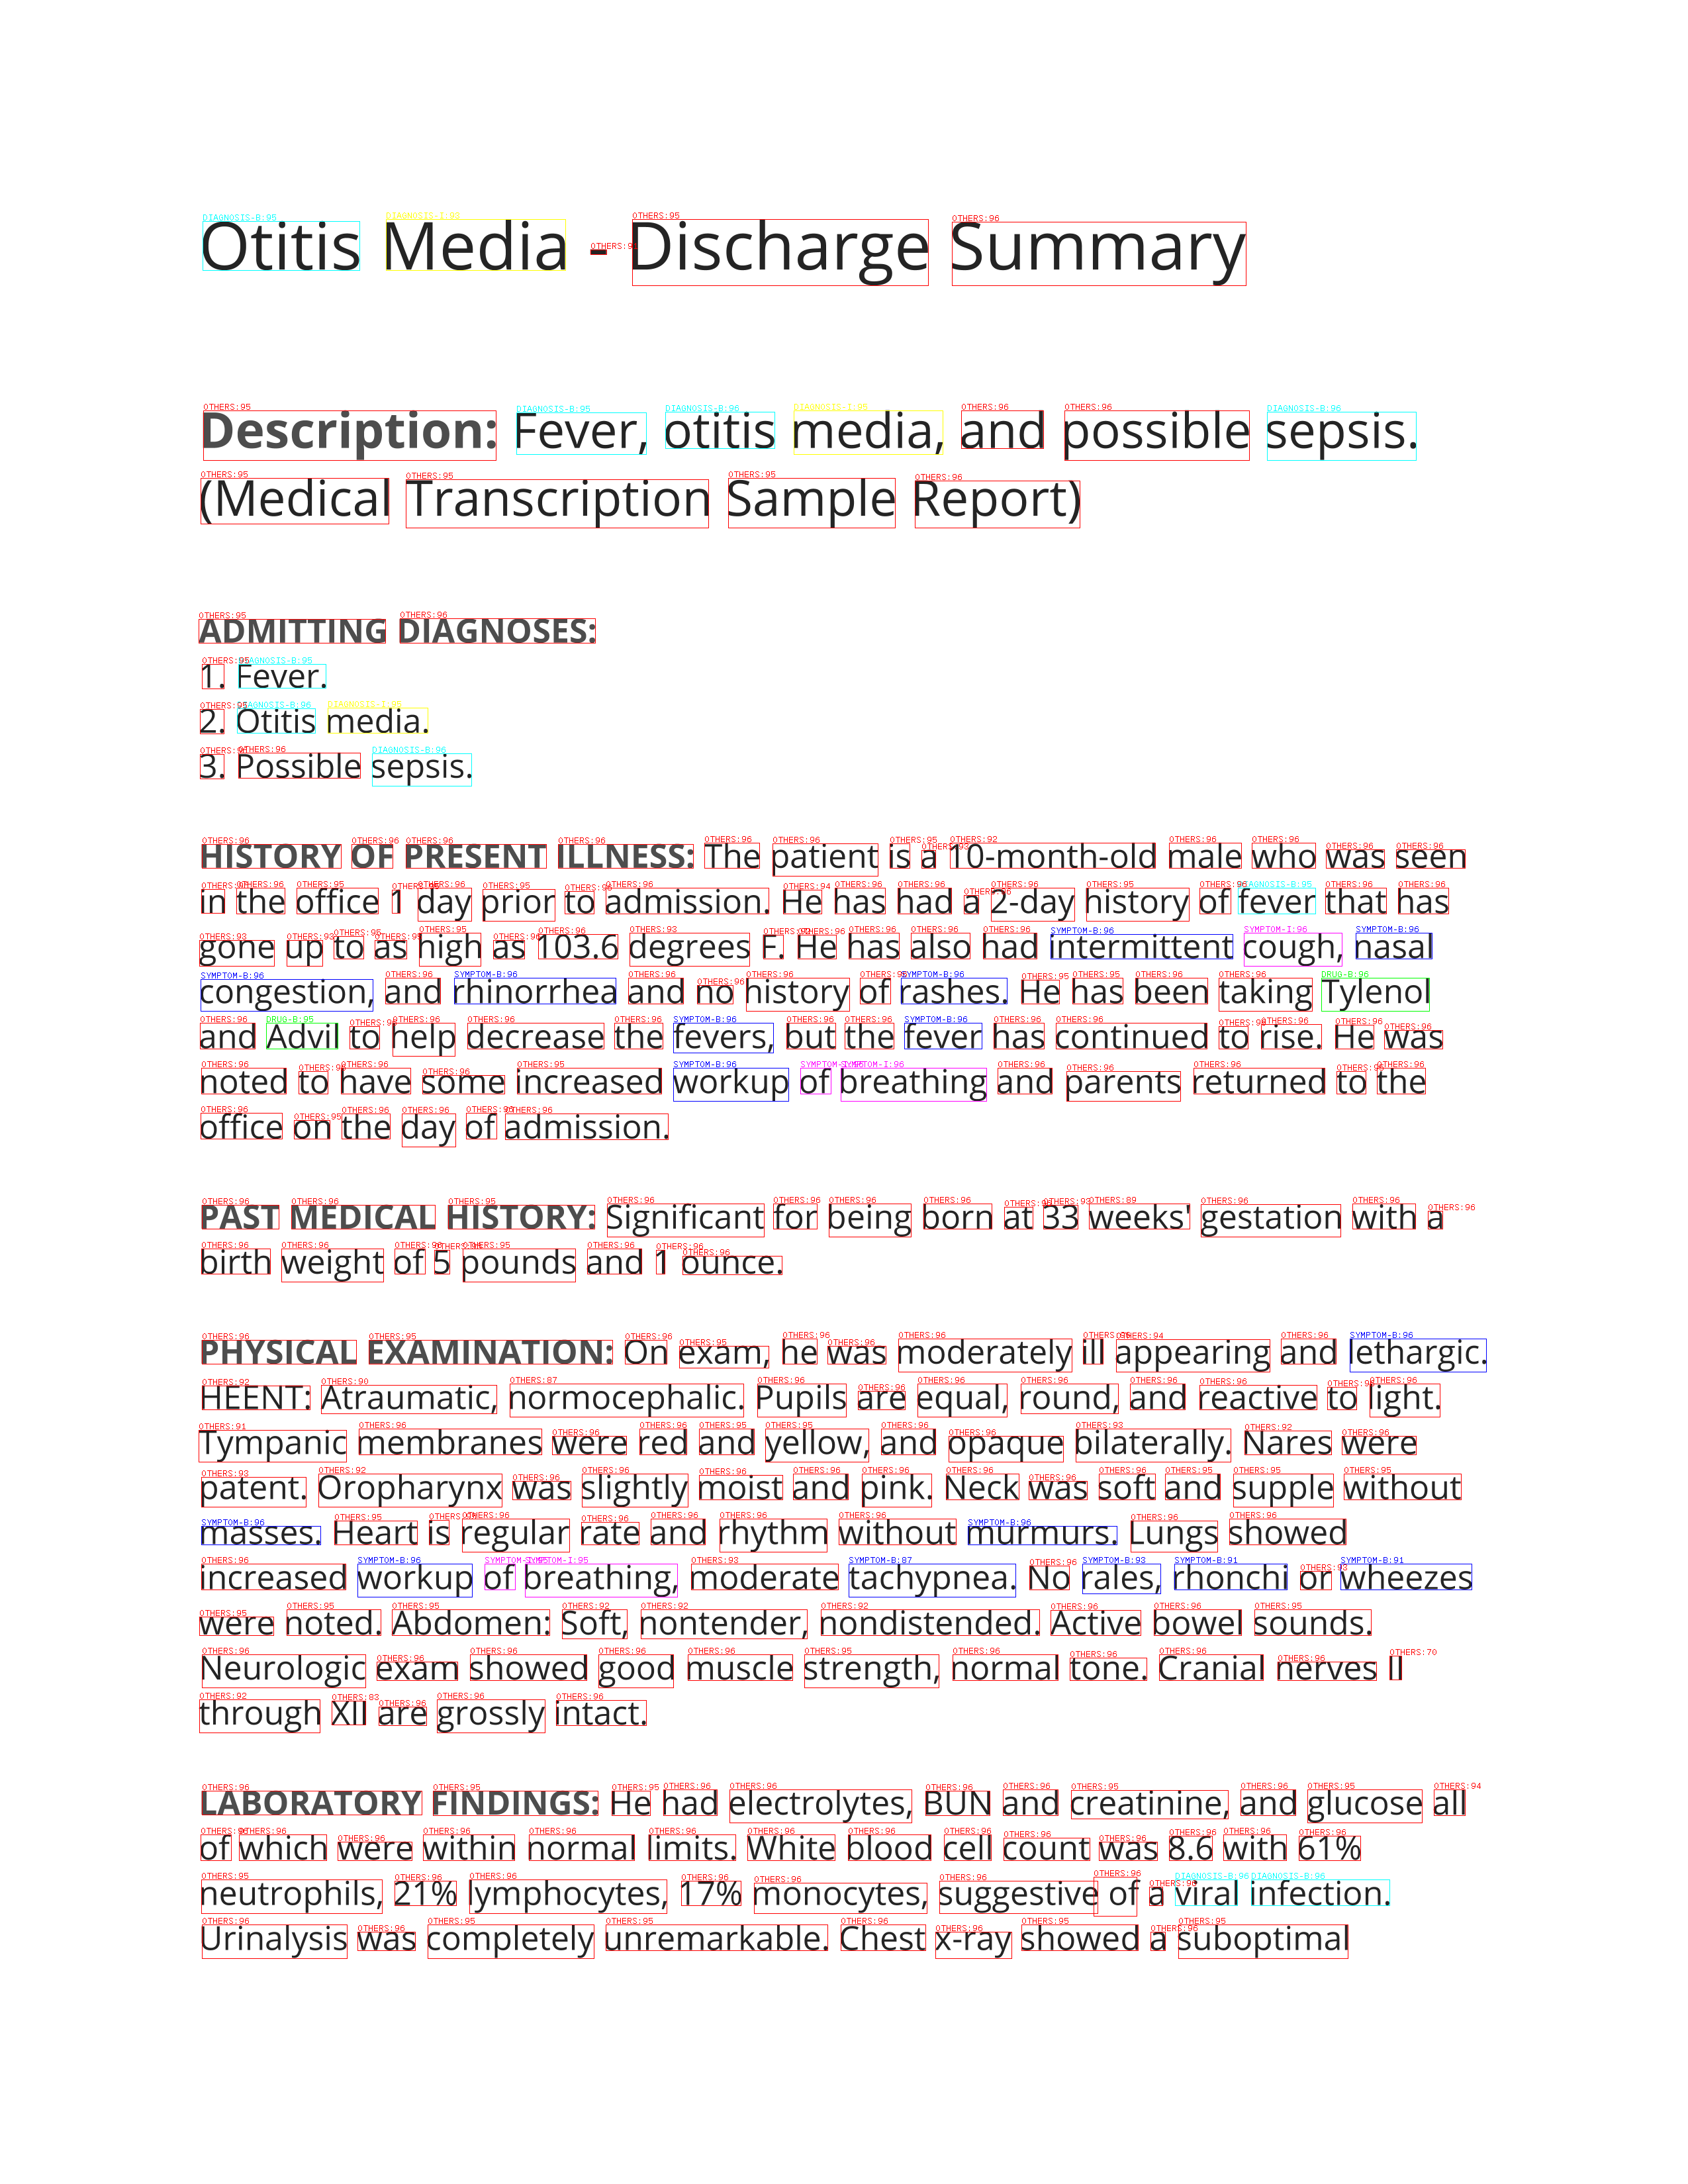

In [11]:
from sparkocr.utils import display_images_horizontal

from sparkocr.utils import display_images

  
bin_df = spark.read.format("binaryFile").load("/content/test")
bin_df = bin_df
results = pipeline_predict.transform(bin_df)

display_images(results, "image_with_annotations")
